# Assignment 4 - MLP Optimization



## Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/winequality-red.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The winequality-red dataset contains  1599 rows and 12 columns.

## Prepare datasets

* Separate X, features and y, target column.

In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:,-1]

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

* Split to get 70% training set and 30% test + valid sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, ee_x, y_train, ee_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(ee_x.shape)
print(ee_y.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


* Split to get the 15% test set and 15% validation set

In [ ]:
x_valid, x_test, y_valid, y_test = train_test_split(ee_x, ee_y, test_size=0.5, random_state=42)

In [ ]:
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(240, 11)
(240,)
(240, 11)
(240,)


## Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_X_ss = StandardScaler()
train_x_ss = scaler_X_ss.fit_transform(x_train)
valid_x_ss = scaler_X_ss.transform(x_valid)
test_x_ss = scaler_X_ss.transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_X_mm = MinMaxScaler()
train_x_mm = scaler_X_mm.fit_transform(x_train)
valid_x_mm = scaler_X_mm.transform(x_valid)
test_x_mm = scaler_X_mm.transform(x_test)

## Convert data into tensors

In [ ]:
import torch

train_x = torch.tensor(x_train.to_numpy())
train_x = train_x.float()
valid_x = torch.tensor(x_valid.to_numpy())
valid_x = valid_x.float()
test_x = torch.tensor(x_test.to_numpy())
test_x = test_x.float()
print(train_x)
print(valid_x)
print(test_x)

tensor([[ 8.6000,  0.2200,  0.3600,  ...,  3.4700,  0.8700, 11.0000],
        [12.5000,  0.4600,  0.6300,  ...,  2.9900,  0.8700, 10.2000],
        [ 7.2000,  0.5400,  0.2700,  ...,  3.3900,  0.7100, 11.0000],
        ...,
        [ 7.2000,  0.6200,  0.0600,  ...,  3.5100,  0.5400,  9.5000],
        [ 7.9000,  0.2000,  0.3500,  ...,  3.3200,  0.8000, 11.9000],
        [ 5.8000,  0.2900,  0.2600,  ...,  3.3900,  0.5400, 13.5000]])
tensor([[ 7.6000,  0.6850,  0.2300,  ...,  3.2100,  0.6100,  9.3000],
        [ 8.3000,  0.6100,  0.3000,  ...,  3.4000,  0.6100, 10.2000],
        [ 6.6000,  0.7250,  0.0900,  ...,  3.3500,  0.4900, 10.8000],
        ...,
        [ 7.2000,  0.5700,  0.0500,  ...,  3.3800,  0.6000, 10.3000],
        [ 9.9000,  0.5900,  0.0700,  ...,  3.3100,  0.7100,  9.8000],
        [ 9.6000,  0.5000,  0.3600,  ...,  3.1800,  0.6800, 10.9000]])
tensor([[ 6.1000,  0.4800,  0.0900,  ...,  3.4500,  0.5400, 11.2000],
        [ 6.1000,  0.7150,  0.1000,  ...,  3.5700,  0.5000, 11

In [ ]:
train_x_ss = torch.tensor(train_x_ss)
train_x_ss = train_x_ss.float()
valid_x_ss = torch.tensor(valid_x_ss)
valid_x_ss = valid_x_ss.float()
test_x_ss = torch.tensor(test_x_ss)
test_x_ss = test_x_ss.float()
print(train_x_ss)
print(valid_x_ss)
print(test_x_ss)

tensor([[ 1.6954e-01, -1.7211e+00,  4.5930e-01,  ...,  1.0118e+00,
          1.2266e+00,  5.5006e-01],
        [ 2.4461e+00, -4.0196e-01,  1.8411e+00,  ..., -2.1069e+00,
          1.2266e+00, -2.0517e-01],
        [-6.4768e-01,  3.7747e-02, -1.2805e-03,  ...,  4.9203e-01,
          2.9727e-01,  5.5006e-01],
        ...,
        [-6.4768e-01,  4.7745e-01, -1.0760e+00,  ...,  1.2717e+00,
         -6.9015e-01, -8.6600e-01],
        [-2.3907e-01, -1.8310e+00,  4.0813e-01,  ...,  3.7218e-02,
          8.2003e-01,  1.3997e+00],
        [-1.4649e+00, -1.3363e+00, -5.2457e-02,  ...,  4.9203e-01,
         -6.9015e-01,  2.9102e+00]])
tensor([[-0.4142,  0.8347, -0.2060,  ..., -0.6775, -0.2836, -1.0548],
        [-0.0056,  0.4225,  0.1522,  ...,  0.5570, -0.2836, -0.2052],
        [-0.9979,  1.0546, -0.9224,  ...,  0.2321, -0.9806,  0.3612],
        ...,
        [-0.6477,  0.2026, -1.1272,  ...,  0.4271, -0.3417, -0.1108],
        [ 0.9284,  0.3126, -1.0248,  ..., -0.0278,  0.2973, -0.5828],
     

In [ ]:
train_x_mm = torch.tensor(train_x_mm)
train_x_mm = train_x_mm.float()
valid_x_mm = torch.tensor(valid_x_mm)
valid_x_mm = valid_x_mm.float()
test_x_mm = torch.tensor(test_x_mm)
test_x_mm = test_x_mm.float()
print(train_x_mm)
print(valid_x_mm)
print(test_x_mm)

tensor([[0.3540, 0.0685, 0.3600,  ..., 0.5748, 0.3067, 0.4000],
        [0.6991, 0.2329, 0.6300,  ..., 0.1969, 0.3067, 0.2769],
        [0.2301, 0.2877, 0.2700,  ..., 0.5118, 0.2086, 0.4000],
        ...,
        [0.2301, 0.3425, 0.0600,  ..., 0.6063, 0.1043, 0.1692],
        [0.2920, 0.0548, 0.3500,  ..., 0.4567, 0.2638, 0.5385],
        [0.1062, 0.1164, 0.2600,  ..., 0.5118, 0.1043, 0.7846]])
tensor([[0.2655, 0.3870, 0.2300,  ..., 0.3701, 0.1472, 0.1385],
        [0.3274, 0.3356, 0.3000,  ..., 0.5197, 0.1472, 0.2769],
        [0.1770, 0.4144, 0.0900,  ..., 0.4803, 0.0736, 0.3692],
        ...,
        [0.2301, 0.3082, 0.0500,  ..., 0.5039, 0.1411, 0.2923],
        [0.4690, 0.3219, 0.0700,  ..., 0.4488, 0.2086, 0.2154],
        [0.4425, 0.2603, 0.3600,  ..., 0.3465, 0.1902, 0.3846]])
tensor([[0.1327, 0.2466, 0.0900,  ..., 0.5591, 0.1043, 0.4308],
        [0.1327, 0.4075, 0.1000,  ..., 0.6535, 0.0798, 0.5385],
        [0.0708, 0.2055, 0.2700,  ..., 0.8189, 0.1656, 0.6000],
        ...,

In [ ]:
train_y, valid_y, test_y = map(torch.tensor, (y_train.to_numpy().reshape(-1,1), y_valid.to_numpy().reshape(-1,1), y_test.to_numpy().reshape(-1,1)))

In [ ]:
train_y = train_y.float()
valid_y = valid_y.float()
test_y = test_y.float()

In [ ]:
train_y

tensor([[7.],
        [5.],
        [5.],
        ...,
        [5.],
        [7.],
        [6.]])

## Set up the dataset class

In [ ]:
from torch.utils.data import Dataset

class WineQualityDataset(Dataset):
    def __init__(self, X, y):
        self.x = X
        self.y = y

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

In [ ]:
train_data = WineQualityDataset(train_x, train_y)
valid_data = WineQualityDataset(valid_x, valid_y)
test_data = WineQualityDataset(test_x, test_y)

In [ ]:
train_data_ss = WineQualityDataset(train_x_ss, train_y)
train_data_mm = WineQualityDataset(train_x_mm, train_y)

In [853]:
from torch.utils.data import DataLoader

#train_loader = DataLoader(dataset=train_data, batch_size=8)
#train_loader_ss = DataLoader(dataset=train_data_ss, batch_size=8)
#train_loader_mm = DataLoader(dataset=train_data_mm, batch_size=8)

train_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True)
train_loader_ss = DataLoader(dataset=train_data_ss, batch_size=8, shuffle=True)
train_loader_mm = DataLoader(dataset=train_data_mm, batch_size=8, shuffle=True)

## Optimize MLP model

### Set up MLP class

In [854]:
class WineQualityMLPBasic(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineQualityMLPBasic, self).__init__()
        self.input = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.fc1 = torch.nn.Linear(self.input, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.outputs)
        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [855]:
class WineQualityMLPTuning(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs, activation='relu', dropout_rate=0.5):
        super(WineQualityMLPTuning, self).__init__()
        self.input = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.fc1 = torch.nn.Linear(self.input, self.hidden)
        self.fc2 = torch.nn.Linear(self.hidden, self.hidden)
        self.fc3 = torch.nn.Linear(self.hidden, self.outputs)
        self.dropout = torch.nn.Dropout(p=dropout_rate)
        self.dropout = torch.nn.Dropout(p=dropout_rate)

        # Activation function selection
        if activation == 'sigmoid':
          self.activation = torch.nn.Sigmoid()
        elif activation == 'tanh':
          self.activation = torch.nn.Tanh()
        else:
          self.activation = torch.nn.ReLU()

    def forward(self, X):
        out = self.fc1(X)
        out = self.activation(out)
        out = self.dropout(out)  # Apply dropout after activation
        out = self.fc2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc3(out)
        return out

In [856]:
def MLPtraining (epochs, model, train_loader, valid_x, valid_y, optimiser, criterion, early_stop=10):
  train_loss = []
  valid_loss = []
  best_valid_loss = float('inf')
  early_stopping_counter = 0

  for epoch in range(epochs):
      print(epoch)
      batch_loss = []
      # Training batch
      for features, targets in train_loader:
          # Get output
          output = model.forward(features)
          # Calculate the loss
          loss = criterion(output, targets)
          batch_loss.append(loss.item())
          optimiser.zero_grad() # Remove previous gradients
          loss.backward() # What the updates should be
          optimiser.step() # Update w&b
      # for each epoch
      # Training loss
      train_loss.append(sum(batch_loss)/len(batch_loss))

      # Valid loss, etc
      hyp_valid = model.forward(valid_x)

      epoch_valid_loss = criterion(hyp_valid, valid_y).item()
      valid_loss.append(epoch_valid_loss)
      print("Valid loss:", valid_loss[-1])

      # Early stopping logic
      if epoch_valid_loss < best_valid_loss:
          best_valid_loss = epoch_valid_loss
          early_stopping_counter = 0  # reset the patience counter
          print("Validation loss decreased")
      else:
          early_stopping_counter += 1
          print(f"Validation loss did not improve. {early_stopping_counter}/{early_stop}")
          if early_stopping_counter >= early_stop:
              print("Early stopping triggered.")
              break

  return train_loss, valid_loss, epoch

## Tuning


In [921]:
model = WineQualityMLPTuning(11, 5, 1, 'relu', 0)
model

WineQualityMLPTuning(
  (fc1): Linear(in_features=11, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
  (dropout): Dropout(p=0, inplace=False)
  (activation): ReLU()
)

In [922]:
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(params=model.parameters(), lr=0.0001, momentum=0.2)

### Training and generate plots

In [923]:
epochs = 5000
train_loss, valid_loss, stopping = MLPtraining (epochs, model, train_loader_ss, valid_x_ss, valid_y, optimiser, criterion, 50)

0
Valid loss: 31.515214920043945
Validation loss decreased
1
Valid loss: 28.200748443603516
Validation loss decreased
2
Valid loss: 24.774024963378906
Validation loss decreased
3
Valid loss: 21.149503707885742
Validation loss decreased
4
Valid loss: 17.350440979003906
Validation loss decreased
5
Valid loss: 13.50740909576416
Validation loss decreased
6
Valid loss: 9.863242149353027
Validation loss decreased
7
Valid loss: 6.719729423522949
Validation loss decreased
8
Valid loss: 4.327644348144531
Validation loss decreased
9
Valid loss: 2.731961488723755
Validation loss decreased
10
Valid loss: 1.799747109413147
Validation loss decreased
11
Valid loss: 1.3048113584518433
Validation loss decreased
12
Valid loss: 1.0523648262023926
Validation loss decreased
13
Valid loss: 0.916161298751831
Validation loss decreased
14
Valid loss: 0.8377494812011719
Validation loss decreased
15
Valid loss: 0.7855939865112305
Validation loss decreased
16
Valid loss: 0.7454493045806885
Validation loss decreas

In [924]:
import matplotlib.pyplot as plt
import numpy as np

# epochs vs. train && epochs vs.valid
def plot_loss_curves(epochs, train_loss, valid_loss):
    plt.plot(epochs, train_loss, label="Train loss")
    plt.plot(epochs, valid_loss, label="Valid loss")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

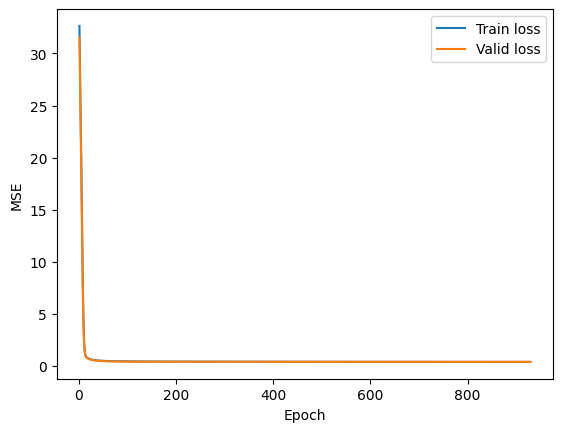

In [925]:
plot_loss_curves(np.linspace(1, stopping, stopping), train_loss[:-1], valid_loss[:-1])

In [926]:
stopping

929

In [927]:
test_output = model.forward(test_x_ss)
test_output.shape

torch.Size([240, 1])

In [928]:
mse_test = criterion(test_output, test_y)

print("The MSE of test set:", mse_test.item())

The MSE of test set: 0.38019827008247375


## Save the model!

In [929]:
import os

# Path to save the model in Google Drive
folder_path = '/content/drive/My Drive/colab-models/Assignment4'
model_path = os.path.join(folder_path, 'TuneV2.9_MLP_model.pth')

# Create the folder if it does not exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [930]:
torch.save(model.state_dict(), model_path)